In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.columns

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

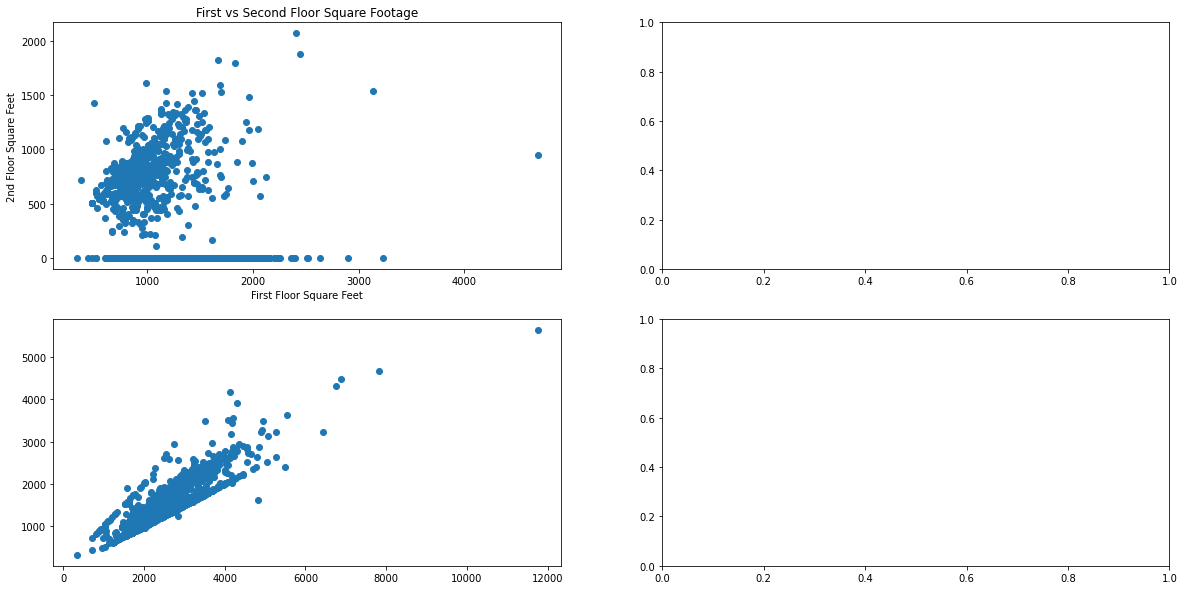

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

fig , ax = plt.subplots(2 , 2 , figsize = (20 , 10))
ax[0,0].scatter(df['1stFlrSF'] , df['2ndFlrSF'] )
ax[0,0].set_xlabel('First Floor Square Feet')
ax[0,0].set_ylabel('2nd Floor Square Feet')
ax[0,0].set_title('First vs Second Floor Square Footage')
ax[1,0].scatter(df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'], df['LowQualFinSF']+df['GrLivArea'])


In [3]:
cat_variable = [df.columns.get_loc(x) for x in ['MSSubClass' , 'MSZoning' , 'Street' , 'Alley' , 'LotShape' ,
                                                'LandContour', 'Utilities' , 'LotConfig' , 'LandSlope' , 
                                                'Neighborhood' , 'Condition1' , 'Condition2' , 'RoofStyle' ,
                                               'RoofMatl' , 'Exterior1st' , 'Exterior2nd'  ,
                                               'Foundation' , 'Heating' , 'CentralAir' , 'Electrical']]
num_variable = [df.columns.get_loc(x) for x in ['LotFrontage' , 'LotArea' , 'OverallQual' , 'OverallCond' ,
                                               'YearBuilt' , 'YearRemodAdd' , 'MasVnrArea' , 'TotalBsmtSF' ,
                                               'BsmtUnfSF' , '1stFlrSF' , '2ndFlrSF' , 'LowQualFinSF'  ]]


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
# Feature engineering to convert categorical variables 
num_variable = []